In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import datetime
import os 
from matplotlib import pyplot as plt
import random
import dask.dataframe as dd
from sklearn import preprocessing

In [20]:
df = pd.read_csv("../DATA/final_sample.csv")

In [21]:
df = df.drop(columns = ['Unnamed: 0'])
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [4]:
#df.set_index('date',inplace = True)

In [140]:
#df['week'] = df.index.week
#df['day'] = df.index.day
#df['month'] = df.index.month
#df['year'] = df.index.year

In [22]:
df

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,transactions,oil_price,family,perishable,holiday,family_cat
0,90594681,2016-09-10,36,1165988,1.0000000,0,1320,45.3150000,GROCERY I,0,0.0000000,12
1,90536016,2016-09-10,2,1165988,4.0000000,0,2184,45.3150000,GROCERY I,0,0.0000000,12
2,90558004,2016-09-10,12,1165988,4.0000000,0,1308,45.3150000,GROCERY I,0,0.0000000,12
3,90593142,2016-09-10,35,1165988,5.0000000,0,760,45.3150000,GROCERY I,0,0.0000000,12
4,90598928,2016-09-10,38,1165988,7.0000000,0,1770,45.3150000,GROCERY I,0,0.0000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...
12528264,124856524,2017-08-09,45,2123036,1.0000000,0,3631,49.5900000,BEVERAGES,0,0.0000000,3
12528265,124327997,2017-08-04,45,2123036,1.0000000,0,4132,49.5700000,BEVERAGES,0,0.0000000,3
12528266,125055751,2017-08-11,44,2123747,1.0000000,0,4418,48.8100000,GROCERY I,0,0.0000000,12
12528267,125061343,2017-08-11,46,2123463,2.0000000,0,3814,48.8100000,GROCERY I,0,0.0000000,12


## Correlation map between variables of interest

In [23]:
corrMatrix = df.corr()

In [24]:
corrMatrix["unit_sales"]

id             -0.0145352
store_nbr       0.0508683
item_nbr        0.0194601
unit_sales      1.0000000
onpromotion     0.0611612
transactions    0.1679606
oil_price       0.0111474
perishable      0.0631855
holiday         0.0063684
family_cat      0.0483282
Name: unit_sales, dtype: float64

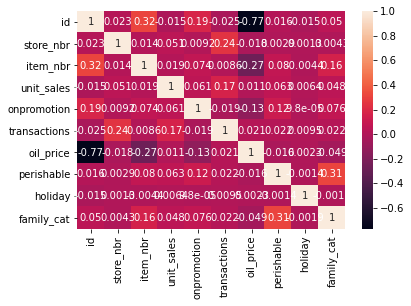

In [25]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Total sales based on product family

In [10]:
#supress scientific notation for easier observation of values
pd.options.display.float_format = '{:.7f}'.format

In [11]:
df_sales_fam = df.groupby('family').sum()
df_sales_fam.reset_index(inplace=True)
df_sales_fam.loc[:,["family","unit_sales"]]

,family,unit_sales
0,AUTOMOTIVE,56100.0000000
1,BABY CARE,1154.0000000
2,BEAUTY,33944.0000000
3,BEVERAGES,21640940.0000000
4,BOOKS,722.0000000
5,BREAD/BAKERY,4196032.8400000
6,CELEBRATION,75592.0000000
7,CLEANING,9717610.0000000
8,DAIRY,6441088.0000000
9,DELI,2407043.0928000


Text(0, 0.5, 'Total Sales')

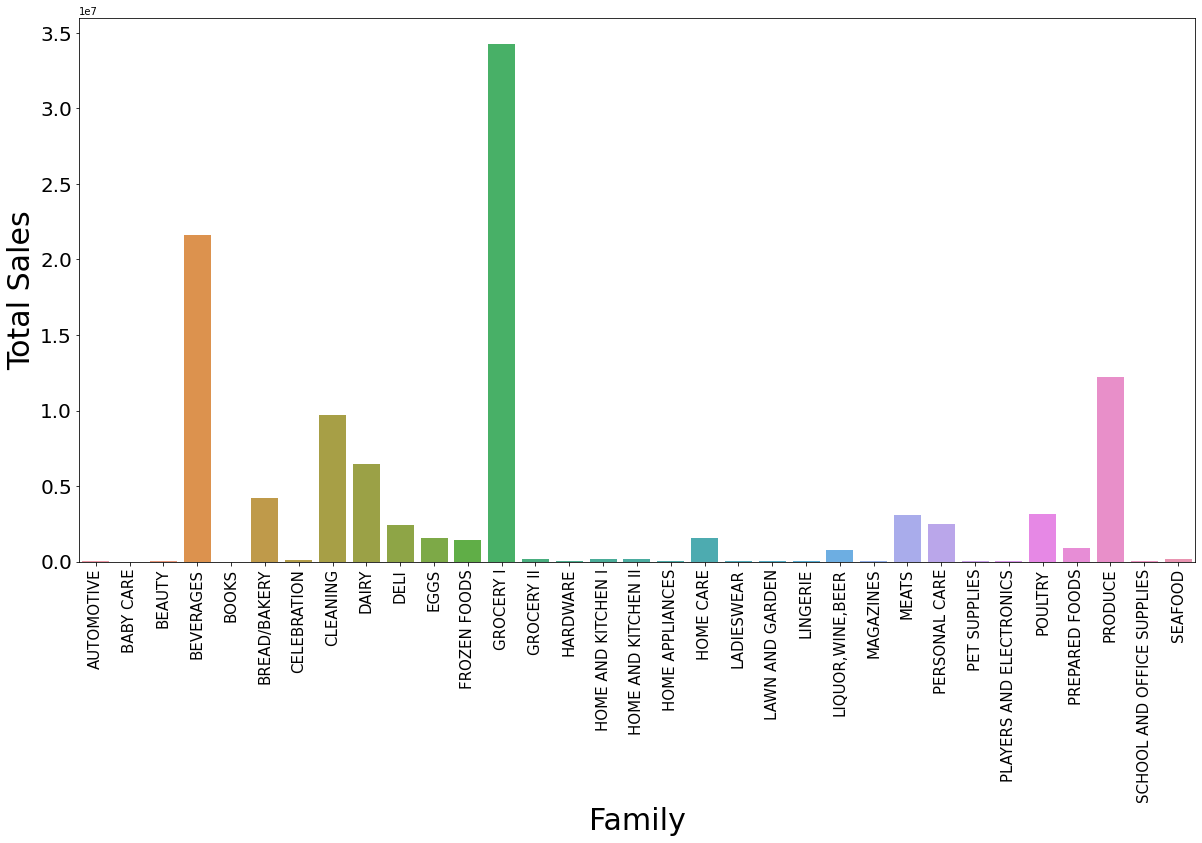

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='family', y='unit_sales', data=df_sales_fam)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=15)
plt.yticks(fontsize=20)
#plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Family',fontsize=30)
plt.ylabel('Total Sales',fontsize=30)

As expected, the largest number of sales that occured were in food and beverages items with `GROCERY I` having the largest sales. This is followed by the `BEVERAGES` and the `PRODUCE` category .  

## Total sales based on perishables

In [13]:
#year = pd.DatetimeIndex(df['date']).year
df_sales_per = df.groupby(['perishable','family']).agg({'unit_sales':'sum'})
df_sales_per.reset_index(inplace=True)
df_sales_per

,perishable,family,unit_sales
0,0,AUTOMOTIVE,56100.0000000
1,0,BABY CARE,1154.0000000
2,0,BEAUTY,33944.0000000
3,0,BEVERAGES,21640940.0000000
4,0,BOOKS,722.0000000
5,0,CELEBRATION,75592.0000000
6,0,CLEANING,9717610.0000000
7,0,FROZEN FOODS,1402777.5150000
8,0,GROCERY I,34279986.2949999
9,0,GROCERY II,197919.0000000


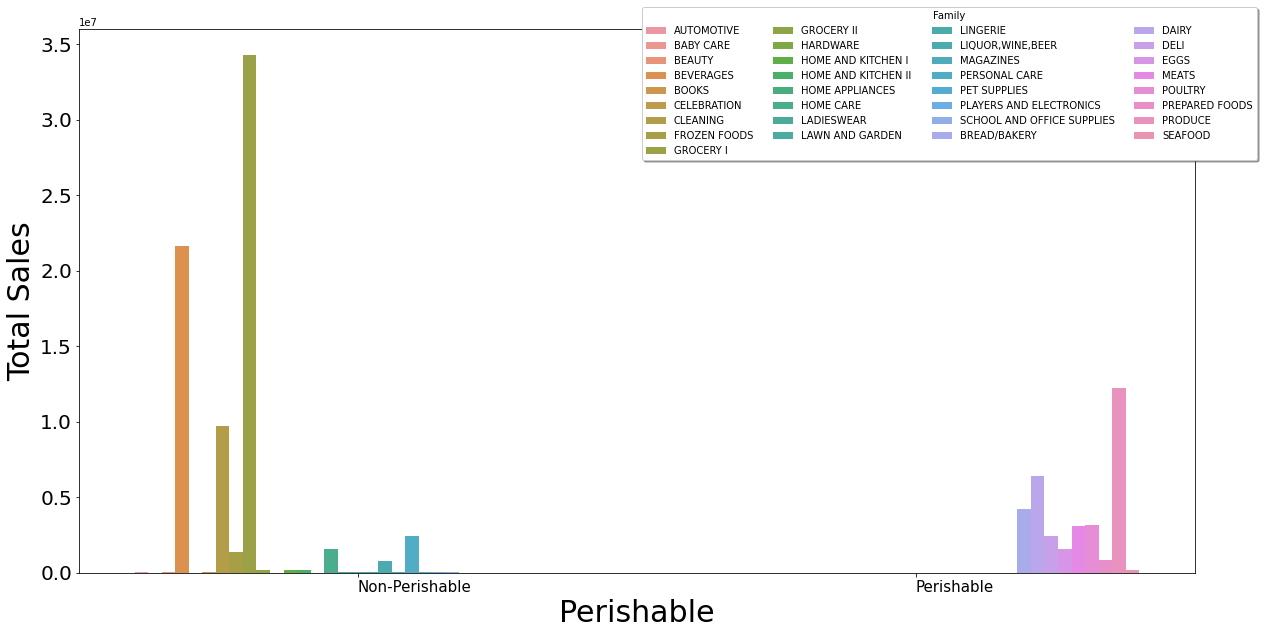

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x='perishable', y='unit_sales', data=df_sales_per, hue='family')
plt.setp(ax.xaxis.get_majorticklabels(), fontsize=15)
plt.yticks(fontsize=20)
ax.set_xticklabels(labels=['Non-Perishable','Perishable'],ha='left')
plt.xlabel('Perishable',fontsize=30)
plt.ylabel('Total Sales',fontsize=30)
ax.legend(loc='upper left', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True, title='Family')

the total sales for non-perishable products is clearly greater than the total sales for perishable products. In non-perishables, `GROCERY I` is the category with the highest number of sales while in perishables, `PRODUCE` has the highest number of sales. 

## Impact of holidays on sales

<b>1</b> in the holiday column represents a national holiday while a <b>0</b> represents a non-holiday. 

In [29]:
df_sales_date = df.groupby('date').agg({'unit_sales':'sum'})
df_sales_date.reset_index(inplace=True)
df_sales_date

,date,unit_sales
0,2013-01-01,276.4860000
1,2013-01-02,48058.8600000
2,2013-01-03,35864.2930000
3,2013-01-04,35686.6950000
4,2013-01-05,48694.4110000
...,...,...
1677,2017-08-11,80014.6120000
1678,2017-08-12,78977.0180000
1679,2017-08-13,83539.3700000
1680,2017-08-14,73337.9370000


In [84]:
holiday_date = df[df['holiday']==1].date
holiday_date = holiday_date.unique()

In [141]:
#dates which are holidays
hol_date = df_sales_date[df_sales_date['date'].isin(holiday_date)]

<AxesSubplot:xlabel='date', ylabel='unit_sales'>

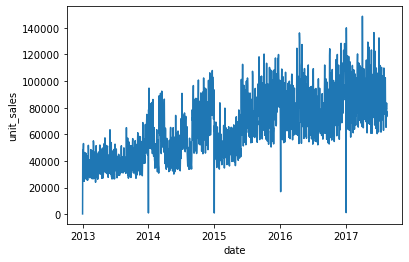

In [30]:
sns.lineplot(x='date',y='unit_sales',data=df_sales_date)

In [40]:
year = pd.DatetimeIndex(df_sales_date['date']).year
year_arr = year.unique()

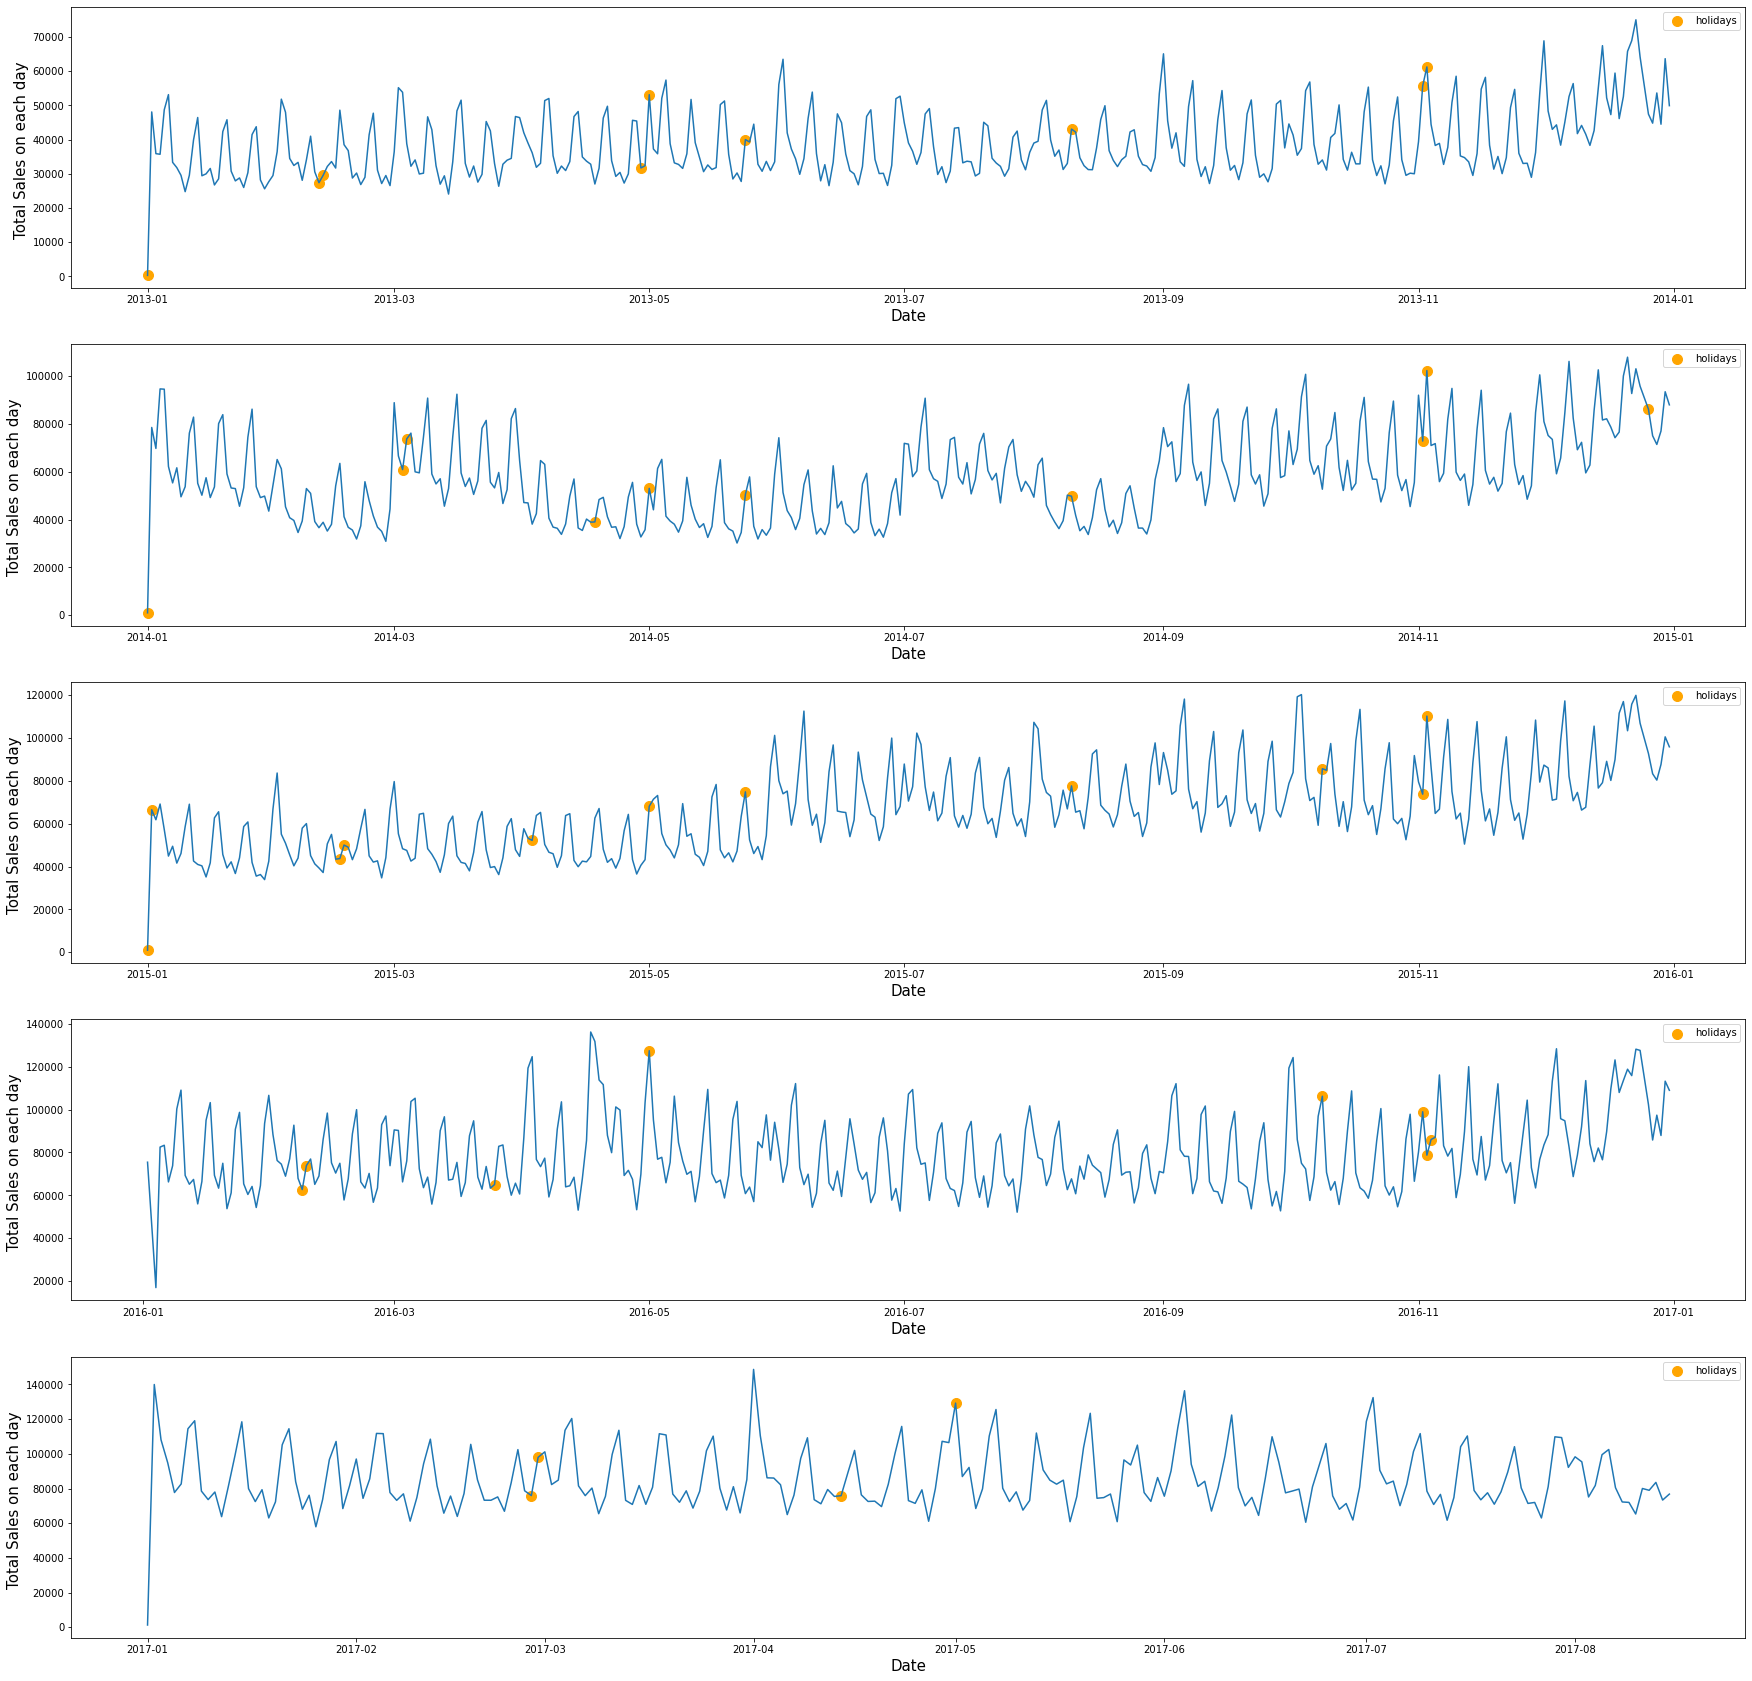

In [139]:
fig, ax = plt.subplots(figsize=(30,30))
for i in range(0, 5):
    plt.subplot(5, 1, i+1)
    sns.lineplot(x='date',y='unit_sales',data=df_sales_date[year==year_arr[i]])
    hol = plt.scatter(hol_date[hol_date['date'].dt.year == year_arr[i]].date, hol_date[hol_date['date'].dt.year == year_arr[i]].unit_sales, marker="o", facecolor="orange", s=100)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Total Sales on each day ',fontsize=15)
    plt.legend(labels=['holidays'],numpoints=1,handles=[hol])

The orange dots represent the days when they are holidays. For this training sample, holidays do not seem to have any noticeable trends on the total sales for that day as compared to other days of the year. 